In [474]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [475]:
df=pd.read_excel("Worksheet in C  Users Shyamrag CP Desktop monexo Datascience_Assignment.xlsx",sheet_name="delq_model")

In [476]:
df.head()

,Linkedin.is.Verified,Facebook.is.Verified,Date.of.Birth,Gender,Education.Level,No.of.dependents,Detailed.reason.by.Applicant,CRIF.S1.Score,Application.incomplete.date,Loan.Amount,...,Residential.status,UTM.Source,Created.Date,pymt_standing,Interest.Rate,Maturity.Date,Total.Amount.Paid,Principal.Advance.Remaining,Delinquent.Amount,Fee.Set
0,NaN,NaN,1980-07-03,Male,Professional,1 to 2,I am working as Software Eng in a IT firm sinc...,753.0,2017-03-01,200000,...,Rented,NaN,2016-11-18,Active - Good Standing,16.41,2020-01-04,113840.00,123741.56,0.00,1-M3
1,NaN,NaN,1983-02-06,Male,Graduate,1 to 2,I am working as an analyst Programmer in a IT ...,NaN,2016-11-18,85000,...,Rented,NaN,2016-11-18,Active - Good Standing,19.50,2018-01-12,87209.00,16762.90,0.00,1-M5
2,NaN,NaN,1994-12-20,Male,Upto Hr Secondary,0,I have enough salary enough that i can take ca...,NaN,2016-11-19,50000,...,Self or spouse owned,NaN,2016-11-19,Active - Bad Standing,16.07,2018-01-12,31222.92,30407.81,19500.56,1-M3
3,NaN,NaN,1981-04-20,Male,Graduate,1 to 2,"Hi team my name is Balaji Polam,from last mont...",NaN,2016-11-20,130000,...,Self or spouse owned,NaN,2016-11-20,Closed - Obligations met,24.23,2019-01-12,174238.16,0.00,0.00,1-M7
4,NaN,NaN,1977-05-29,Male,Post Graduate,3 to 5,I want to pay children's education fess and my...,NaN,2016-11-21,85000,...,Company Quarters,NaN,2016-11-21,Active - Good Standing,19.55,2019-01-12,63229.00,47146.24,0.00,1-M5


In [477]:
# Application ID -- Unique Identification.
df["Application.ID"].isna().sum() #3 NA values in Application ID. removing them from our data.
df=df.loc[df["Application.ID"].isna()==False,]

In [478]:
# Column  Linkedin.is.Verified/Facebook.is.Verified (Socila media)
# Will combine these two variables as social media verified
df.loc[df["Linkedin.is.Verified"]==1,"Socialmedia_verified"] = 1
df.loc[df["Facebook.is.Verified"]==1,"Socialmedia_verified"] = 1
df.loc[df["Socialmedia_verified"]!=1,"Socialmedia_verified"] = 0
pd.Series(df.Socialmedia_verified).value_counts()

0.0    1098
1.0     889
Name: Socialmedia_verified, dtype: int64

In [479]:
# Function for count checking
def Frequency_count(column):
    column = pd.Series(column).value_counts()
    return column

In [480]:
# Date of Birth.
df["Date.of.Birth"].isna().sum() ## No missing values
df["year"] = [x.year for x in df["Date.of.Birth"]]
df["Age"] = 2018-df["year"]
df.head()


,Linkedin.is.Verified,Facebook.is.Verified,Date.of.Birth,Gender,Education.Level,No.of.dependents,Detailed.reason.by.Applicant,CRIF.S1.Score,Application.incomplete.date,Loan.Amount,...,pymt_standing,Interest.Rate,Maturity.Date,Total.Amount.Paid,Principal.Advance.Remaining,Delinquent.Amount,Fee.Set,Socialmedia_verified,year,Age
0,NaN,NaN,1980-07-03,Male,Professional,1 to 2,I am working as Software Eng in a IT firm sinc...,753.0,2017-03-01,200000,...,Active - Good Standing,16.41,2020-01-04,113840.00,123741.56,0.00,1-M3,0.0,1980,38
1,NaN,NaN,1983-02-06,Male,Graduate,1 to 2,I am working as an analyst Programmer in a IT ...,NaN,2016-11-18,85000,...,Active - Good Standing,19.50,2018-01-12,87209.00,16762.90,0.00,1-M5,0.0,1983,35
2,NaN,NaN,1994-12-20,Male,Upto Hr Secondary,0,I have enough salary enough that i can take ca...,NaN,2016-11-19,50000,...,Active - Bad Standing,16.07,2018-01-12,31222.92,30407.81,19500.56,1-M3,0.0,1994,24
3,NaN,NaN,1981-04-20,Male,Graduate,1 to 2,"Hi team my name is Balaji Polam,from last mont...",NaN,2016-11-20,130000,...,Closed - Obligations met,24.23,2019-01-12,174238.16,0.00,0.00,1-M7,0.0,1981,37
4,NaN,NaN,1977-05-29,Male,Post Graduate,3 to 5,I want to pay children's education fess and my...,NaN,2016-11-21,85000,...,Active - Good Standing,19.55,2019-01-12,63229.00,47146.24,0.00,1-M5,0.0,1977,41


In [481]:
# Gender
pd.Series(df["Gender"]).value_counts()  ## Male is more in the data Set.

Male      1690
Female     297
Name: Gender, dtype: int64

In [482]:
# Education.Level
df["Education.Level"].isna().sum()  ## No NA values.
pd.Series(df["Education.Level"]).value_counts()   ## Graduates are more in  the data set.

Graduate             1217
Post Graduate         318
Diploma               179
Upto Hr Secondary     163
Professional          110
Name: Education.Level, dtype: int64

In [483]:
# No.of.dependents
Frequency_count(df["No.of.dependents"]) # Dependency 1 to 2 is more, 
df["No.of.dependents"].isna().sum()  # No NA Value


0

In [484]:
# Detailed.reason.by.Applicant
df["Detailed.reason.by.Applicant"].head(20)
# is complete open data. So it good to do sentimental Analysis on this separatly.
# How ever we have one more variable capturing purpose -- CL.Purpose..Name -- which is a categorical.
df["CL.Purpose..Name"].isna().sum()   # NA value
Frequency_count(df["CL.Purpose..Name"])  ## Major reasons are dept consolidation.

Debt Consolidation    478
Home renovation       398
Household General     366
Wedding               259
Medical               232
Education             118
Business               97
Holiday                39
Name: CL.Purpose..Name, dtype: int64

In [485]:
# CRIF.S1.Score -- credit score
df["CRIF.S1.Score"].isna().sum()  ## 185 NA values.
# Frequency_count(df["CRIF.S1.Score"])
# pd.pivot_table(data=df,index="pymt_standing",values="CRIF.S1.Score",aggfunc="median")
# Substitute median value for NAs by segmenting with pymt_standing.
df.loc[df["CRIF.S1.Score"].isna() & list(df["pymt_standing"]=="Active - Bad Standing"),"CRIF.S1.Score"] = 692.5
df.loc[df["CRIF.S1.Score"].isna() & list(df["pymt_standing"]=="Active - Active - Good Standing"),"CRIF.S1.Score"] = 735.0
df.loc[df["CRIF.S1.Score"].isna() & list(df["pymt_standing"]=="Active - Closed - Obligations met"),"CRIF.S1.Score"] = 710.0

df.loc[df["CRIF.S1.Score"].isna(),"CRIF.S1.Score"] =711

# pd.pivot_table(data=df,index="pymt_standing",values="CRIF.S1.Score",aggfunc="count")

# df["CRIF.S1.Score"].head()
# df["CRIF.S1.Score"].isna().sum()
# type(df["CRIF.S1.Score"])

count      1987.000000
mean     108404.630096
std       64730.141956
min       50000.000000
25%       62000.000000
50%       95000.000000
75%      125000.000000
max      500000.000000
Name: Loan.Amount, dtype: float64

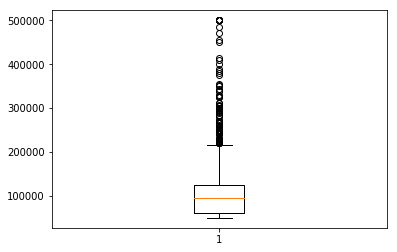

In [486]:
# Loan.Amount
df["Loan.Amount"].isna().sum() # No NA Values.
plt.boxplot(df["Loan.Amount"])
df["Loan.Amount"].describe()
# Seems we do have outliers. But Loan amount is the important info for predicting default. -- leaving unaltered as of now.

count     1987.000000
mean      4950.311812
std       2605.235582
min       2034.220000
25%       3437.595000
50%       4476.040000
75%       5412.285000
max      46816.930000
Name: Payment.Amount, dtype: float64

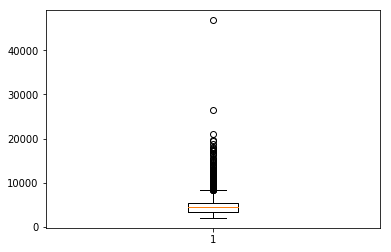

In [487]:
# Payment.Amount
df["Payment.Amount"].isna().sum() # no NA values.
plt.boxplot(df["Payment.Amount"])
df["Payment.Amount"].describe()
# assuming Payment amount and Loan amount are correlated. payment amount also depends on the term-tenure of the loan.

count      1987.000000
mean      10098.414373
std       13326.177848
min           0.000000
25%        3089.430000
50%        6101.740000
75%       12650.735000
max      155104.730000
Name: Interest.Paid, dtype: float64

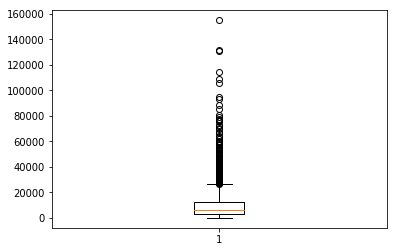

In [488]:
# Interest.Paid
df["Interest.Paid"].isna().sum() # No NA Values.
plt.boxplot(df["Interest.Paid"])
df["Interest.Paid"].describe()
# Assuming correlated with Loan amount.

count      1987.000000
mean      26553.576085
std       39666.327828
min           0.000000
25%        5575.935000
50%       13529.870000
75%       30228.665000
max      455000.000000
Name: Principal.Advance.Paid, dtype: float64

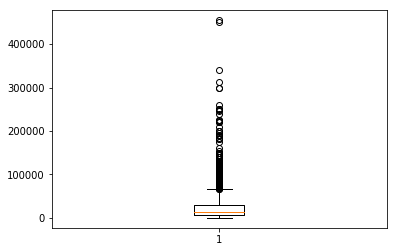

In [489]:
# Principal.Advance.Paid -- Principal component paid till date
df["Principal.Advance.Paid"].isna().sum()  # No NA Values.
plt.boxplot(df["Principal.Advance.Paid"])
df["Principal.Advance.Paid"].describe()
#Assuming a correlation with Loan amount.

In [490]:
# EPFO.Verification.Status
df["EPFO.Verification.Status"].isna().sum()  # ALL are NA.
Frequency_count("EPFO.Verification.Status")
# Since all values are NA not required.
df.drop("EPFO.Verification.Status",axis=1,inplace=True)

In [491]:
# Marital.status
df["Marital.status"].isna().sum() #NO NA values.
Frequency_count(df["Marital.status"])  # Most Applicants are single and Married

Single      1011
Married      968
Divorcee       5
Widower        3
Name: Marital.status, dtype: int64

In [492]:
# Total.years.of.experience.in.Employment.
df["Total.years.of.experience.in.Employment."].isna().sum()
Frequency_count(df["Total.years.of.experience.in.Employment."])

3.0     244
4.0     227
5.0     212
2.0     189
6.0     177
7.0     149
8.0     124
10.0    124
1.0      84
9.0      75
12.0     67
11.0     51
15.0     50
14.0     48
13.0     41
0.0      32
20.0     23
17.0     15
18.0     15
16.0     14
25.0      6
26.0      5
21.0      3
22.0      3
24.0      2
27.0      2
30.0      2
23.0      2
19.0      1
Name: Total.years.of.experience.in.Employment., dtype: int64

count    1987.000000
mean       28.711626
std         9.127158
min         6.000000
25%        24.000000
50%        36.000000
75%        36.000000
max        36.000000
Name: Term, dtype: float64

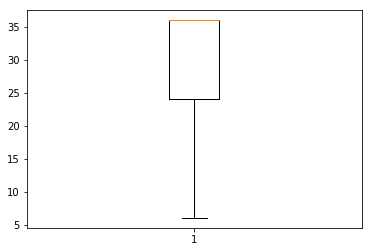

In [493]:
# Term
df["Term"].isna().sum() # NO NA values.
plt.boxplot(df["Term"])
df["Term"].describe()

In [494]:
# First.Payment.Date.y
df["First.Payment.Date.y"].isna().sum() # No nA values.

0

count      1987.000000
mean      31870.766694
std       24726.008947
min        2676.060000
25%       13443.235000
50%       28054.640000
75%       40646.070000
max      260773.760000
Name: Estimated.Interest, dtype: float64

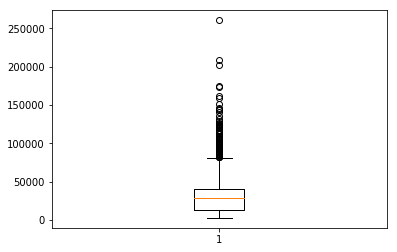

In [495]:
# Estimated.Interest
df["Estimated.Interest"].isna().sum() # No nA Values.
plt.boxplot(df["Estimated.Interest"])
df["Estimated.Interest"].describe()
# Assuming correlated with Loan Amount.

In [496]:
# Last.Payment.Date
df["Last.Payment.Date"].isna().sum() # NA values.
pd.pivot_table(data=df.loc[df["Last.Payment.Date"].isna(),],index="pymt_standing",values="Application.ID",aggfunc="count")
# Required attention here I don't think last payment is important, He/she can pay less amount as well. So dropping it.
df.drop("Last.Payment.Date",axis=1,inplace=True)

In [497]:
# Bank.Transactions.Fetched
df["Bank.Transactions.Fetched"].isna().sum()
Frequency_count(df["Bank.Transactions.Fetched"])
# All values are zeroes and this variable is not required.
df.drop("Bank.Transactions.Fetched",axis=1,inplace=True)

In [498]:
# Debt.service.ratio
df["Debt.service.ratio"].isna().sum()  ## We have NA value. Substitute it with median based on target variable.
Frequency_count(df["Debt.service.ratio"])
pd.pivot_table(data=df,index="pymt_standing",values="Debt.service.ratio",aggfunc="median")
# Substitution
df.loc[df["Debt.service.ratio"].isna() & list(df["pymt_standing"]=="Active - Bad Standing"),"Debt.service.ratio"] = 40.76
df.loc[df["Debt.service.ratio"].isna() & list(df["pymt_standing"]=="Active - Active - Good Standing"),"Debt.service.ratio"] = 43.55
df.loc[df["Debt.service.ratio"].isna() & list(df["pymt_standing"]=="Active - Closed - Obligations met"),"Debt.service.ratio"] = 40.46

df.loc[df["Debt.service.ratio"].isna(),"Debt.service.ratio"] = 41.5

pd.pivot_table(data=df,index="pymt_standing",values="Debt.service.ratio",aggfunc="count")


,Debt.service.ratio
pymt_standing,
Active - Bad Standing,304
Active - Good Standing,1513
Closed - Obligations met,170


count      1987.000000
mean      30345.077252
std       26822.933651
min       15000.000000
25%       18081.500000
50%       22950.000000
75%       31500.000000
max      514223.000000
Name: Salary.Income.current.month, dtype: float64

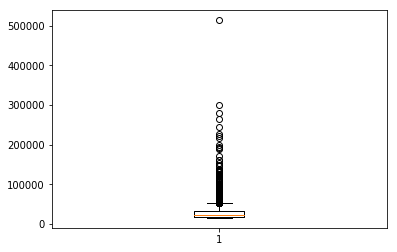

In [499]:
# Salary.Income.current.month
df["Salary.Income.current.month"].isna().sum()  # No NA values
plt.boxplot(df["Salary.Income.current.month"])
df["Salary.Income.current.month"].describe()
# Seems we have outliers, assuming its also having a good correlation to Loan amount.

In [500]:
# Residential.status
df["Residential.status"].isna().sum()# No NA values.
Frequency_count(df["Residential.status"])  ## most people are living in rented House.

Rented                               1061
Staying with Parents                  474
Self or spouse owned                  335
Company Quarters                       48
Paying Guest                           42
Shared Accommodation                   19
Hostel                                  6
Paying Guest/Shared Accommodation       2
Name: Residential.status, dtype: int64

In [501]:
# UTM.Source accquisition channel
df["UTM.Source"].isna().sum() # NA values.
pd.pivot_table(data=df[["pymt_standing","UTM.Source","Application.ID"]],index="pymt_standing",columns="UTM.Source",aggfunc="count")
# Most customers are through facebook and Google. they are almost equal. less information gain. So will not be including in the predictive model.


Application.ID                                      
UTM.Source                     Facebook Myuniverse_loan facebook gmail google
pymt_standing                                                                
Active - Bad Standing              49.0             1.0     10.0   NaN   85.0
Active - Good Standing            383.0             1.0     24.0   6.0  429.0
Closed - Obligations met           22.0             NaN      1.0   NaN   39.0

count    1987.000000
mean       20.564238
std         3.309047
min        13.500000
25%        18.270000
50%        19.840000
75%        21.910000
max        30.810000
Name: Interest.Rate, dtype: float64

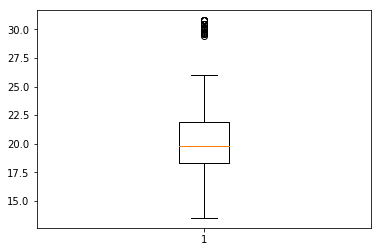

In [502]:
# Interest.Rate
df["Interest.Rate"].isna().sum()
plt.boxplot(df["Interest.Rate"])
df["Interest.Rate"].describe()

# For few-- Interest rate is high.

count      1987.000000
mean      36851.603840
std       48130.768515
min           0.000000
25%        9639.000000
50%       20859.240000
75%       45406.960000
max      518784.880000
Name: Total.Amount.Paid, dtype: float64

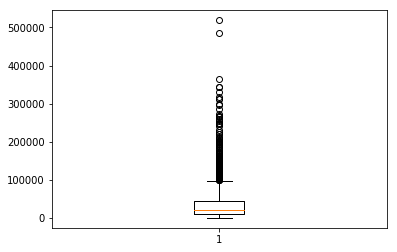

In [503]:
# Total.Amount.Paid
df["Total.Amount.Paid"].isna().sum() # NO NA values.
plt.boxplot(df["Total.Amount.Paid"])
df["Total.Amount.Paid"].describe()
# Assuming total amount paid is correlated with Loan Amount.

count      1987.000000
mean      81851.054026
std       59132.847732
min           0.000000
25%       44951.495000
50%       72954.600000
75%      102855.510000
max      500000.000000
Name: Principal.Advance.Remaining, dtype: float64

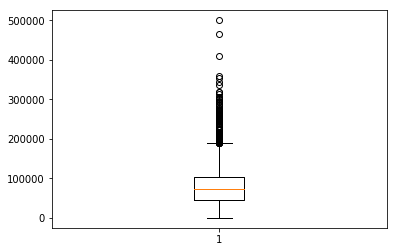

In [504]:
# Principal.Advance.Remaining
df["Principal.Advance.Remaining"].isna().sum()  # No NA Values.
plt.boxplot(df["Principal.Advance.Remaining"])
df["Principal.Advance.Remaining"].describe()
# This correlated with principle amount/ Loan amount.

,Delinquent.Amount
pymt_standing,
Active - Bad Standing,19420.939013
Active - Good Standing,0.000000
Closed - Obligations met,0.000000


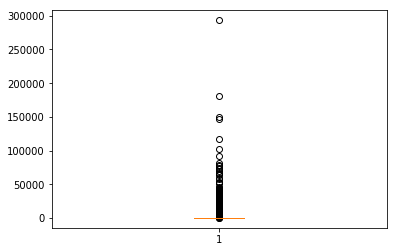

In [505]:
# Delinquent.Amount
df["Delinquent.Amount"].isna().sum()
plt.boxplot(df["Delinquent.Amount"])
df["Delinquent.Amount"].describe()
# Only if any payment is remaining. so applicable to BAD Customers only.in a way it is homogeonous. and less info gain. as we are going to predict as a part of acquisition.
pd.pivot_table(data=df,index="pymt_standing",values="Delinquent.Amount",aggfunc="mean")
#  IT is clear that If any deliquent amount existing then he/she is a bad customer. 
# We have this info as on going loan, if we need to predict at the time of accquisition, we need to exclude this parameter.

In [506]:
# Fee.Set
df["Fee.Set"].isna().sum()
Frequency_count(df["Fee.Set"]) ## Most people are Under Monexo Fee set.

Monexo Fee Set    1007
1-M5               211
1-M6               201
1-M7               139
1-M4               131
1-M3               111
1-M8                83
1-M2                65
1-M1                39
Name: Fee.Set, dtype: int64

In [507]:
# Playing with Date columns in data -- 

# We have following columns realated to application process dates "Application.incomplete.date"	"Contract.Date"	"Application.Completion.time"	"Created.Date"	"Maturity.Date"
# Not all columns are important. so deriving a new column "Submission Duration"  == Created.Date to Application.Completion.time 
# Duration will be in Days.

df["Submission_Duration"]=df["Application.Completion.time"] - df["Created.Date"]
# values are in char, so split 
df["Submission_Duration"] = df["Submission_Duration"].apply(lambda x: str(x).split()[0])
df.loc[df["Submission_Duration"]=="NaT","Submission_Duration"]  # 15 NAT values.
df.loc[df["Submission_Duration"]=="NaT","Submission_Duration"] = 2  # Punching with a random number of days.
df.head(20)


,Linkedin.is.Verified,Facebook.is.Verified,Date.of.Birth,Gender,Education.Level,No.of.dependents,Detailed.reason.by.Applicant,CRIF.S1.Score,Application.incomplete.date,Loan.Amount,...,Interest.Rate,Maturity.Date,Total.Amount.Paid,Principal.Advance.Remaining,Delinquent.Amount,Fee.Set,Socialmedia_verified,year,Age,Submission_Duration
0,NaN,NaN,1980-07-03,Male,Professional,1 to 2,I am working as Software Eng in a IT firm sinc...,753.0,2017-03-01,200000,...,16.41,2020-01-04,113840.00,123741.56,0.00,1-M3,0.0,1980,38,103
1,NaN,NaN,1983-02-06,Male,Graduate,1 to 2,I am working as an analyst Programmer in a IT ...,711.0,2016-11-18,85000,...,19.50,2018-01-12,87209.00,16762.90,0.00,1-M5,0.0,1983,35,0
2,NaN,NaN,1994-12-20,Male,Upto Hr Secondary,0,I have enough salary enough that i can take ca...,692.5,2016-11-19,50000,...,16.07,2018-01-12,31222.92,30407.81,19500.56,1-M3,0.0,1994,24,0
3,NaN,NaN,1981-04-20,Male,Graduate,1 to 2,"Hi team my name is Balaji Polam,from last mont...",711.0,2016-11-20,130000,...,24.23,2019-01-12,174238.16,0.00,0.00,1-M7,0.0,1981,37,0
4,NaN,NaN,1977-05-29,Male,Post Graduate,3 to 5,I want to pay children's education fess and my...,711.0,2016-11-21,85000,...,19.55,2019-01-12,63229.00,47146.24,0.00,1-M5,0.0,1977,41,0
5,NaN,NaN,1995-08-17,Male,Graduate,0,I am a DATA ANALYST in a UK based FUND company...,711.0,2016-11-21,95000,...,19.55,2019-01-12,109376.92,0.00,0.00,1-M5,0.0,1995,23,0
6,NaN,NaN,1995-08-17,Male,Graduate,0,I am currently working as a Senior Analyst in ...,748.0,NaT,251000,...,18.27,2021-01-06,18220.00,240361.02,0.00,Monexo Fee Set,0.0,1995,23,512
7,NaN,NaN,1991-03-22,Male,Graduate,0,"Hi Sir, I am applying loan for clearing my deb...",711.0,2016-11-22,95000,...,19.28,2019-01-12,69880.00,48931.56,0.00,1-M5,0.0,1991,27,1
8,NaN,NaN,1986-04-13,Male,Graduate,1 to 2,I am working as an accountant in a IT firm sin...,711.0,2016-11-22,180000,...,25.03,2019-01-12,143539.58,96634.34,0.00,1-M7,0.0,1986,32,0
9,NaN,NaN,1987-12-24,Male,Post Graduate,0,I am working with HR company with 4.6 years. I...,711.0,2016-11-23,175000,...,19.28,2019-01-12,128720.00,90144.46,0.00,1-M5,0.0,1987,31,1


In [508]:
# Data Cleaning is finished 

# DATA UNDERSTANDING EDA

In [509]:
EDA_df= df[["Application.ID","Socialmedia_verified","Age","Gender","Delinquent.Amount","Education.Level","No.of.dependents","CL.Purpose..Name","pymt_standing","CRIF.S1.Score","Loan.Amount","Payment.Amount","Interest.Paid","Principal.Advance.Paid","Estimated.Interest","Salary.Income.current.month","Term","Interest.Rate","Total.Amount.Paid","Principal.Advance.Remaining","Marital.status","Total.years.of.experience.in.Employment.","Residential.status","Fee.Set","Submission_Duration","Debt.service.ratio"]]

In [510]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1989
Data columns (total 26 columns):
Application.ID                              1987 non-null object
Socialmedia_verified                        1987 non-null float64
Age                                         1987 non-null int64
Gender                                      1987 non-null object
Delinquent.Amount                           1987 non-null float64
Education.Level                             1987 non-null object
No.of.dependents                            1987 non-null object
CL.Purpose..Name                            1987 non-null object
pymt_standing                               1987 non-null object
CRIF.S1.Score                               1987 non-null float64
Loan.Amount                                 1987 non-null int64
Payment.Amount                              1987 non-null float64
Interest.Paid                               1987 non-null float64
Principal.Advance.Paid                      1

In [511]:
# Our target Variable is pymt_standing
# taking pivot table to indentify the significance.


In [512]:
# Delinquent.Amount
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Delinquent.Amount",aggfunc="sum",margins=True)
# From the past data Delinquest is 100% useful, but not for accquisition model.

,Delinquent.Amount
pymt_standing,
Active - Bad Standing,5903965.46
Active - Good Standing,0.00
Closed - Obligations met,0.00
All,5903965.46


In [513]:
# Social media
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Socialmedia_verified",aggfunc="sum",margins=True) ## verification is good predictor

,Socialmedia_verified
pymt_standing,
Active - Bad Standing,107.0
Active - Good Standing,730.0
Closed - Obligations met,52.0
All,889.0


In [514]:
# Age
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Age",aggfunc="mean",margins=True) ## not a good predictor

,Age
pymt_standing,
Active - Bad Standing,31.236842
Active - Good Standing,30.441507
Closed - Obligations met,31.147059
All,30.623553


In [515]:
# Gender
pd.pivot_table(data=EDA_df[["Gender","pymt_standing","Application.ID"]],index="pymt_standing",columns="Gender",values="Application.ID",aggfunc="count",margins=True)

# % female good customer is 81%
# % male good customer is 75%  
# not a well predictor variable.

Gender,Female,Male,All
pymt_standing,,,
Active - Bad Standing,32,272,304
Active - Good Standing,243,1270,1513
Closed - Obligations met,22,148,170
All,297,1690,1987


In [516]:
# Education.Level
pd.pivot_table(data=EDA_df[["Education.Level","pymt_standing","Application.ID"]],index="pymt_standing",columns="Education.Level",values="Application.ID",aggfunc="count",margins=True)
# Each category having 74 to 79% good customer

Education.Level,Diploma,Graduate,Post Graduate,Professional,Upto Hr Secondary,All
pymt_standing,,,,,,
Active - Bad Standing,20,191,49,15,29,304
Active - Good Standing,143,922,238,86,124,1513
Closed - Obligations met,16,104,31,9,10,170
All,179,1217,318,110,163,1987


In [517]:
# CL.Purpose..Name
pd.pivot_table(data=EDA_df[["CL.Purpose..Name","pymt_standing","Application.ID"]],index="pymt_standing",columns="CL.Purpose..Name",values="Application.ID",aggfunc="count",margins=True)

# Business and and eduction purpose have more than 80%

CL.Purpose..Name,Business,Debt Consolidation,Education,Holiday,Home renovation,Household General,Medical,Wedding,All
pymt_standing,,,,,,,,,
Active - Bad Standing,11,68,13,6,64,56,43,43,304
Active - Good Standing,83,365,96,30,304,271,172,192,1513
Closed - Obligations met,3,45,9,3,30,39,17,24,170
All,97,478,118,39,398,366,232,259,1987


In [518]:
# CRIF.S1.Score
pd.pivot_table(data=EDA_df,index="pymt_standing",values="CRIF.S1.Score",aggfunc="mean",margins=True)
# All the three categories are having very close Credit score.

,CRIF.S1.Score
pymt_standing,
Active - Bad Standing,672.500000
Active - Good Standing,692.635823
Closed - Obligations met,681.970588
All,688.642677


In [519]:
# Loan.Amount
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Loan.Amount",aggfunc="mean",margins=True)
# Average Loan amount for a Bad customer is high.

,Loan.Amount
pymt_standing,
Active - Bad Standing,112947.368421
Active - Good Standing,107243.225380
Closed - Obligations met,110617.647059
All,108404.630096


In [520]:
# Payment.Amount
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Payment.Amount",aggfunc="mean",margins=True)
# Average Payment.Amount for a Bad customer is high.

,Payment.Amount
pymt_standing,
Active - Bad Standing,5203.733191
Active - Good Standing,4868.557046
Closed - Obligations met,5224.752176
All,4950.311812


In [521]:
# Interest.Paid
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Interest.Paid",aggfunc="mean",margins=True)
# Average Interest.Paid for a Bad customer is high.

,Interest.Paid
pymt_standing,
Active - Bad Standing,14066.837632
Active - Good Standing,9398.085354
Closed - Obligations met,9234.868118
All,10098.414373


In [522]:
# Principal.Advance.Paid
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Principal.Advance.Paid",aggfunc="mean",margins=True)
# Average Principal.Advance.Paid for a Bad customer is high.

,Principal.Advance.Paid
pymt_standing,
Active - Bad Standing,20812.050724
Active - Good Standing,18261.803648
Closed - Obligations met,110617.549059
All,26553.576085


In [523]:
# Estimated.Interest
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Estimated.Interest",aggfunc="mean",margins=True)
# Average Estimated.Interest for a Bad customer is high.

,Estimated.Interest
pymt_standing,
Active - Bad Standing,34131.705954
Active - Good Standing,31393.660549
Closed - Obligations met,32073.920000
All,31870.766694


In [524]:
# Salary.Income.current.month
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Salary.Income.current.month",aggfunc="mean",margins=True)
# Average Salary.Income.current.month for a Bad customer is high.

,Salary.Income.current.month
pymt_standing,
Active - Bad Standing,32200.754934
Active - Good Standing,29490.202247
Closed - Obligations met,34635.076471
All,30345.077252


In [525]:
# Term
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Term",aggfunc="mean",margins=True)
# Average Term are closer

,Term
pymt_standing,
Active - Bad Standing,28.684211
Active - Good Standing,28.828156
Closed - Obligations met,27.723529
All,28.711626


In [526]:
# Interest.Rate
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Interest.Rate",aggfunc="mean",margins=True)
# Average Interest.Rate are closer

,Interest.Rate
pymt_standing,
Active - Bad Standing,20.946941
Active - Good Standing,20.516074
Closed - Obligations met,20.308529
All,20.564238


In [527]:
# Total.Amount.Paid
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Total.Amount.Paid",aggfunc="mean",margins=True)
# Average Total.Amount.Paid are higher than good, May be because of fine. But Not a good predictor since he/she already became BAD

,Total.Amount.Paid
pymt_standing,
Active - Bad Standing,35468.060066
Active - Good Standing,27773.415373
Closed - Obligations met,120121.583000
All,36851.603840


In [528]:
# Principal.Advance.Remaining
pd.pivot_table(data=EDA_df,index="pymt_standing",values="Principal.Advance.Remaining",aggfunc="mean",margins=True)



,Principal.Advance.Remaining
pymt_standing,
Active - Bad Standing,92135.317763
Active - Good Standing,88981.421738
Closed - Obligations met,0.098000
All,81851.054026


In [529]:
# Marital.status
pd.pivot_table(data=EDA_df[["Marital.status","pymt_standing","Application.ID"]],index="pymt_standing",columns="Marital.status",values="Application.ID",aggfunc="count",margins=True)

Marital.status,Divorcee,Married,Single,Widower,All
pymt_standing,,,,,
Active - Bad Standing,1.0,162.0,141.0,NaN,304
Active - Good Standing,4.0,724.0,782.0,3.0,1513
Closed - Obligations met,NaN,82.0,88.0,NaN,170
All,5.0,968.0,1011.0,3.0,1987


In [530]:
# Residential.status
pd.pivot_table(data=EDA_df[["Residential.status","pymt_standing","Application.ID"]],index="pymt_standing",columns="Residential.status",values="Application.ID",aggfunc="count",margins=True)

# Paying Guest Showing  88% good customer


Residential.status,Company Quarters,Hostel,Paying Guest,Paying Guest/Shared Accommodation,Rented,Self or spouse owned,Shared Accommodation,Staying with Parents,All
pymt_standing,,,,,,,,,
Active - Bad Standing,11.0,NaN,4.0,NaN,175.0,48.0,1.0,65.0,304
Active - Good Standing,36.0,5.0,37.0,NaN,786.0,262.0,15.0,372.0,1513
Closed - Obligations met,1.0,1.0,1.0,2.0,100.0,25.0,3.0,37.0,170
All,48.0,6.0,42.0,2.0,1061.0,335.0,19.0,474.0,1987


In [531]:
# Fee.Set
pd.pivot_table(data=EDA_df[["Fee.Set","pymt_standing","Application.ID"]],index="pymt_standing",columns="Fee.Set",values="Application.ID",aggfunc="count",margins=True)

# 90% from monexo fee set are good customers.

Fee.Set,1-M1,1-M2,1-M3,1-M4,1-M5,1-M6,1-M7,1-M8,Monexo Fee Set,All
pymt_standing,,,,,,,,,,
Active - Bad Standing,7,10,32,14,60,48,45,22,66,304
Active - Good Standing,27,47,63,97,124,120,74,53,908,1513
Closed - Obligations met,5,8,16,20,27,33,20,8,33,170
All,39,65,111,131,211,201,139,83,1007,1987


In [532]:
# Checking Correlation for Numeric columns
corr_df = EDA_df[["Loan.Amount","Payment.Amount","Interest.Paid","Principal.Advance.Paid","Salary.Income.current.month"]]

In [533]:
import seaborn as sns

In [534]:
corr_plot = corr_df.corr()

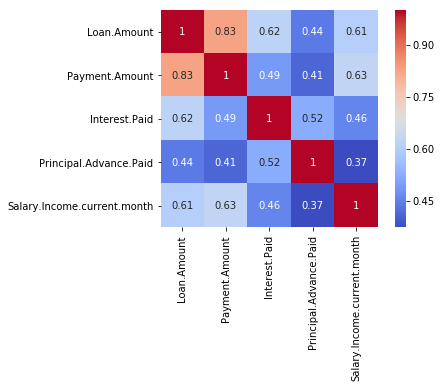

In [535]:
plt.Figure(figsize=(14,14))
sns.heatmap(corr_plot,cbar=True,square=True,annot=True,cmap="coolwarm")

In [536]:
model_df = EDA_df[["Socialmedia_verified","Gender","Education.Level","CL.Purpose..Name","pymt_standing","CRIF.S1.Score","Loan.Amount","Payment.Amount","Interest.Paid","Principal.Advance.Paid","Salary.Income.current.month","Marital.status","Total.years.of.experience.in.Employment.","Residential.status","Fee.Set","Submission_Duration","Debt.service.ratio"]]

Splitting Data for Medel Preparation

In [537]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [538]:
# shuffling data frame
model_df = shuffle(model_df)


In [539]:
# We have 170 Closed obligation, we don't need this because we don't know whether they defaulted and rolled back later.
model_df = model_df.loc[model_df["pymt_standing"]!="Closed - Obligations met",]
print(len(model_df.pymt_standing))
Frequency_count(model_df.pymt_standing)

1817


Active - Good Standing    1513
Active - Bad Standing      304
Name: pymt_standing, dtype: int64

In [540]:
# converting to numeric format
model_df.loc[model_df["pymt_standing"]=="Active - Good Standing","Target"] = 1
model_df.loc[model_df["pymt_standing"]=="Active - Bad Standing","Target"] = 0
model_df.drop("pymt_standing",axis=1,inplace=True)
Frequency_count(model_df.Target)

1.0    1513
0.0     304
Name: Target, dtype: int64

In [542]:
X=model_df.drop("Target",axis=1)
Y=model_df["Target"]

In [545]:
df_cat = ["Gender","Education.Level","CL.Purpose..Name","Marital.status","Residential.status","Fee.Set"]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X[df_cat] = X[df_cat].apply(le.fit_transform)

In [546]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Modelling  Using Random Forest

In [548]:
# RandomForest Algorithm is used. More the number of tree bettr the model and Rnadom forest is stable than  any other model.

# Default Hyper-parameters,# Defaul 
from sklearn.ensemble import RandomForestClassifier

In [550]:
model_default  = RandomForestClassifier()
model_default.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [551]:
# Making predictions
predict_default = model_default.predict(x_test)

In [552]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [553]:
print(classification_report(y_test,predict_default))
print("\nConfusion Matrix\n",confusion_matrix(y_test,predict_default))
print("\nAccuracy is",accuracy_score(y_test,predict_default))

             precision    recall  f1-score   support

        0.0       0.61      0.44      0.51        63
        1.0       0.89      0.94      0.91       301

avg / total       0.84      0.85      0.85       364


Confusion Matrix
 [[ 28  35]
 [ 18 283]]

Accuracy is 0.8543956043956044


In [556]:
#  All the Hyper-Parameters which we can use for Decision tree algorithms can also be tuned here, Like min sample split, min sample leaf,
#  Max Depth of tree, Max leaf nodes, etc.

#  Apart from that we are going to tune Decision tree hyper-parameters. number of trees,
#  Number of attribute to be used at nodes for splitting.
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [557]:
model_tune = RandomForestClassifier(random_state=20)
parameters = {"max_depth":range(5,13,5),
              "min_samples_split":range(20,50,20),
              "min_samples_leaf":range(20,50,20),
              "max_features":range(4,7,2),
              "n_estimators":range(60,101,20)}
nFolds = 5

model_rf = GridSearchCV(estimator=model_tune,param_grid=parameters,scoring="accuracy",cv=nFolds,verbose=1)
model_rf.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 13, 5), 'min_samples_split': range(20, 50, 20), 'min_samples_leaf': range(20, 50, 20), 'max_features': range(4, 7, 2), 'n_estimators': range(60, 101, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [560]:
model_rf.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'n_estimators': 60}

In [561]:
# So build the tree based on these params and check scores.

In [564]:
model_tuned = RandomForestClassifier(max_depth=10,max_features=6,min_samples_leaf=20,min_samples_split=20,n_estimators=60,random_state=20)
model_tuned.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [565]:
# Prediction on model_tuned
predict_tuned = model_tuned.predict(x_test)

In [566]:
print(classification_report(y_test,predict_tuned))
print("\nConfusion Matrix\n",confusion_matrix(y_test,predict_tuned))
print("\nAccuracy is",accuracy_score(y_test,predict_tuned))

             precision    recall  f1-score   support

        0.0       1.00      0.30      0.46        63
        1.0       0.87      1.00      0.93       301

avg / total       0.89      0.88      0.85       364


Confusion Matrix
 [[ 19  44]
 [  0 301]]

Accuracy is 0.8791208791208791


In [568]:
pd.Series(predict_tuned).value_counts()

1.0    345
0.0     19
dtype: int64